In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# make_regression?

# n_sample = number of houses
# n_features = no of features 
# n_informative = no. of features on which y depends
# n_target = no. of points in y, example in price range we have 2 values, this is output
# coef = you want coeff of line or not, no of features = no of coefficients
# noise = kitna upar neeche jana hai line se
# bias = y intercept, line 0,0 se pass hogi if no bias is passed, bias=100 means x = 0 then y will be 100

In [13]:
bias = 100
X, y, coef= make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

In [15]:
X.shape

(100, 1)

In [16]:
y.shape

(100,)

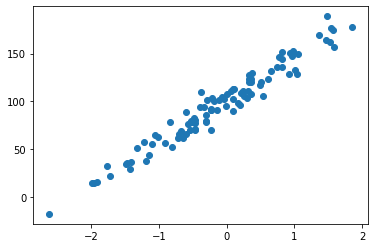

In [17]:
plt.scatter(X, y)

In [18]:
coef # this is slope, slope of the line that is made, 41 in this example, means at 0 y is 100 then at 1 value will be 141, at 2 value of y will be 182
bias # is intercept, value above 0,0

# fixed charge is bias/intercept
# per unit charge = slope/coeff

100

In [28]:
y_gen = X * coef + bias # y_gen is y generated
y[:10], y_gen[:10]

(array([150.77992943,  89.93472984,  65.08160809, 110.52674299,
         82.26162276, 131.56459551,  69.93111725, 105.91200699,
        123.47337416, 132.34359474]), array([[138.87265687],
        [103.63344041],
        [ 55.84998201],
        [113.11702943],
        [ 79.99874007],
        [127.03523224],
        [ 80.6564356 ],
        [122.64705321],
        [125.53204133],
        [141.88856736]]))

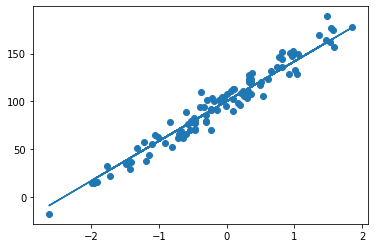

In [30]:
plt.scatter(X, y)
plt.plot(X, y_gen)

# this line is generated by us, here we know the value of m and c, but in real world we wont know the value of m and c

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
# fit_intercept = do we want C
# intercept is bias in our above example

In [23]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(model.coef_, model.intercept_)
print(coef, bias)

[44.43716999] 101.16511532052698
41.7411003148779 100


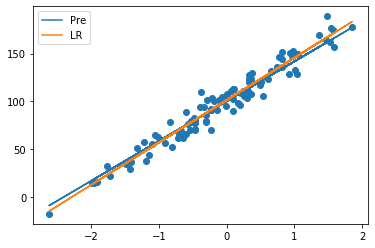

In [25]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

# this is called gradient descent algorithm

In [31]:
class LinearRegCustom:
    def __init__(self, lr=0.1):
        self.lr = lr
        
    def fit(self, X, y):
        self.__X = X # __X means X is private
        self.__y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
    
        errors = []
    
        for i in range(100):
            self.gradient_decend()
            errors.append(self.error())
#             print(self.coef_, self.intercept_)  # to see zig zap errors
        return errors
            
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
        
    def gradient(self):
        yh = self.predict(self.__X)  # y hypothesis, this is predict function
        
        # from derivation, d is delta
        d_coef = ((yh - self.__y) * self.__X).mean()
        d_intercept = (yh - self.__y).mean()
        
        return d_coef, d_intercept
     
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self.__X) - self.__y) ** 2).sum()
    

44.41514436363744 101.15355539783116


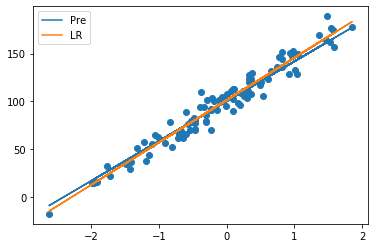

In [32]:
model = LinearRegCustom(lr=.1)
# notice that at l2 = 1.5, vales goes up down up down
errors = model.fit(X, y)

# these are the values where error is minimum
print(model.coef_, model.intercept_)

plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

100

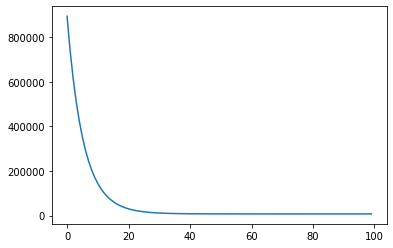

In [39]:
plt.plot(errors)
len(errors)

In [34]:
model.error()  # stable error now

7805.473252108938